In [1]:
import numpy as np
def MSEcost(self, A2, Y):
    m = Y.shape[1]
    E2 = Y - A2
    cost = np.sum(E2 * E2) / m
    return cost

In [12]:
def CEcost(self, A2, Y):
    m = Y.shape[1] # number of example
    logprobs = np.multiply(Y, np.log(A2))
    cost = -np.sum(logprobs) / m
    cost = np.squeeze(cost)
    return cost

In [3]:
def softmax(self, a):
    exp_a = np.exp(a - np.max(a))
    return exp_a / np.sum(exp_a)

In [7]:
#%%writefile code/LogisticNeuron_stochastic.py
#%load code/LogisticNeuron_stochastic.py
# author: idebtor@gmail.com
# import external libraries
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

class LogisticNeuron_stochastic(object):
    """implements Logistic Regression using cross entropy with stochastic gradient descent"""
    def __init__(self, n_x, n_h, n_y, eta = 0.2, epochs = 5, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
        np.random.seed(self.random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1      
        self.b2 = np.zeros((self.n_y, 1))
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  
        
    def CEcost(self, A2, Y):
        m = Y.shape[1]      # number of example
        logprobs = np.multiply(Y, np.log(A2))
        cost = -np.sum(logprobs)/m
        cost = np.squeeze(cost)        
        return cost  
    
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0) + self.b1         
        A1 = self.g(Z1)                          
        Z2 = np.dot(self.W2, A1) + self.b2       
        A2 = self.softmax(Z2)                   
        return Z1, A1, Z2, A2

    def fit(self, X, y): 
        self.cost_ = []
        self.m_samples = len(y)
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
               
        for epoch in range(self.epochs):           
            for sample in range(self.m_samples):            
                A0 = np.array(X[sample], ndmin=2).T  
                Y0 = np.array(Y[sample], ndmin=2).T  

                Z1, A1, Z2, A2 = self.forpass(A0)          # forward pass
                
                # Cost function: Compute the cross-entropy cost
                cost = self.CEcost(A2, Y0)
                self.cost_.append(cost)
                # Backpropagation. 
                E2 = Y0 - A2                
                dZ2 = E2 
                dW2 = np.dot(dZ2, A1.T) / self.m_samples
                db2 = np.sum(dZ2, axis=1, keepdims=True) / self.m_samples
                
                E1 = np.dot(self.W2.T, E2)  
                dZ1 = E1 * self.g_prime(Z1)  #sigmoid
                #dZ1 = E1 * (1 - np.power(A1, 2)) #tanh
                dW1 = np.dot(dZ1, A0.T) 
                db1 = np.sum(dZ1, axis=1, keepdims=True) 
                
                # update weights 
                self.W1 += self.eta * dW1 
                self.b1 += self.eta * db1 
                self.W2 += self.eta * dW2 
                self.b2 += self.eta * db2 
            print('Training epoch {}/{}, cost = {}'.format(epoch+1, self.epochs, cost))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2  

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):           # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def softmax(self, a):           # prevent it from overlfow and undeflow
        exp_a = np.exp(a - np.max(a))
        return exp_a / np.sum(exp_a)
    
    def evaluate(self, Xtest, ytest):   # fully vectorized calculation
        m_samples = len(ytest)  
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores = np.sum(yhat == ytest)
        return scores/m_samples * 100
        

In [2]:
import numpy as np
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
self_accuracy = []
test_accuracy = []
epoch_list = np.arange(1, 5)
for e in epoch_list:
    nn = joy.LogisticNeuron_stochastic(784, 100, 10, eta = 0.2, epochs = e)  
    nn.fit(X, y)       
    self_accuracy.append(nn.evaluate(X, y))  
    test_accuracy.append(nn.evaluate(Xtest, ytest))

Training epoch 1/1, cost = 0.5781736658604737
Training epoch 1/2, cost = 0.5781736658604737
Training epoch 2/2, cost = 0.589353663539634
Training epoch 1/3, cost = 0.5781736658604737
Training epoch 2/3, cost = 0.589353663539634
Training epoch 3/3, cost = 0.5852162029472544
Training epoch 1/4, cost = 0.5781736658604737
Training epoch 2/4, cost = 0.589353663539634
Training epoch 3/4, cost = 0.5852162029472544
Training epoch 4/4, cost = 0.5781152463082013


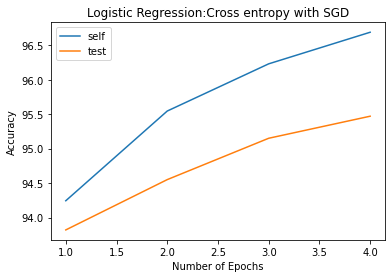

In [3]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression:Cross entropy with SGD')
plt.legend(loc='best')
plt.show()

In [4]:
import joy

(X, y), (Xtest, ytest) = joy.load_mnist()
(X, y), (Xtest, ytest) = joy.load_mnist(normalize = False, flatten = False)

In [5]:
import joy
import numpy as np

(X, y), (xt, yt) = joy.load_mnist()
X_std = X[:]
X_std = np.asfarray(X) / 255.0 * 0.99 + 0.01
print(X_std[0])

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [6]:
import joy
(X, y), (Xt, yt) = joy.load_mnist(normalize = False, flatten = False)
joy.save_mnist_csv(X[:3], y[:3], 'train3.csv')

Writing images(data/train3.csv)....


Reading images(data/train3.csv)...3


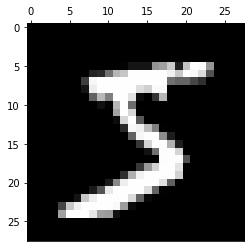

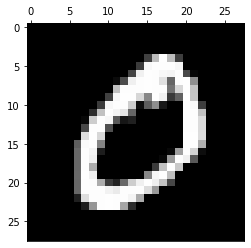

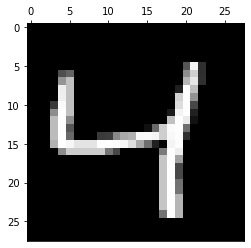

In [7]:
import joy
X, y = joy.read_mnist_csv('train3.csv')
for i, yi in enumerate(y):
    joy.show_mnist(X[i])

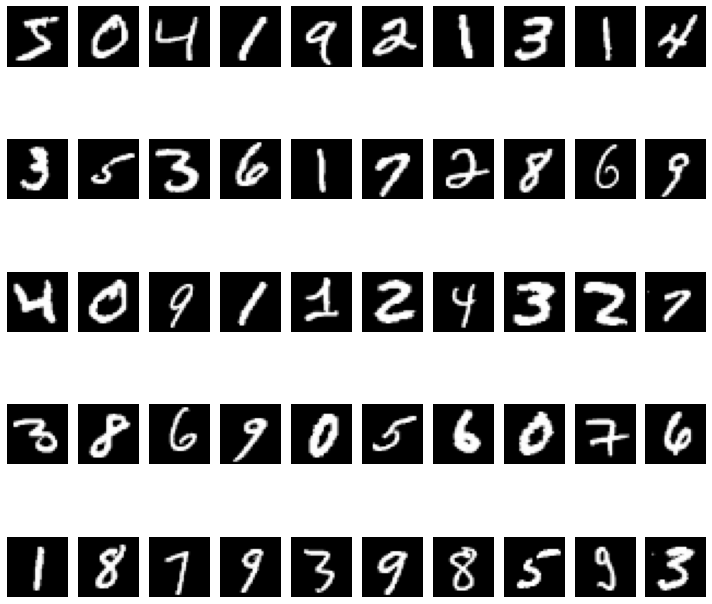

In [8]:
import joy
(X, y), (Xt, yt) = joy.load_mnist(flatten = False)
joy.show_mnist_grid(X[:50])

In [9]:
 def one_hot_encoding(y, n_y, modified = True):
    yhot = np.eye(n_y)[np.array(y, dtype = 'int32').flatten()]
    if modified:
        yhot[yhot == 0] = 0.01
        yhot[yhot == 1] = 0.99
    return yhot

Label: 5


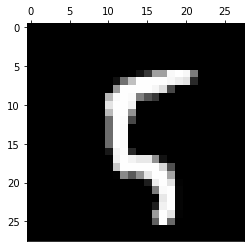

Label: 7


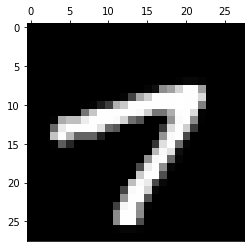

Label: 1


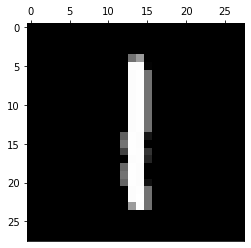

In [10]:
import joy
n_th = 100
(X,y), (Xt, yt) = joy.load_mnist(flatten=False)
for i,yi in enumerate(y[n_th:n_th+3]):
    print('Label:', y[n_th + i])
    joy.show_mnist(X[n_th + i])

In [30]:
# %%writefile code/MnistBGD.py
#%load code/MnistBGD.py
import numpy as np
class MnistBGD_LS(object):
    """ Batch Gradient Descent
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, random_seed=1):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
                
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                      # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                       # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        
        # learning rate is scheduled to decrement by a step of which the inteveral from 0 to eta
        # eqaully divided by total number of iterations (or epochs * m_samples)
        learning_schedule = np.linspace(self.eta, 0.0001, self.epochs)
        
        # for momentum
        #self.v1 = np.zeros_like(self.W1)
        #self.v2 = np.zeros_like(self.W2)
        
        for epoch in range(self.epochs):
            if (epoch) % 100 == 0:
                print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))

            # input X can be tuple, list, or ndarray
            A0 = np.array(X, ndmin=2).T       # A0 : inputs, minimum 2 dimensional array
            Y0 = np.array(Y, ndmin=2).T       # Y: targets

            Z1, A1, Z2, A2 = self.forpass(A0)   # forward pass

            E2 = Y0 - A2                           # E2: output errors
            E1 = np.dot(self.W2.T, E2)          # E1: hidden errors

            # back prop and update weights
            #self.W2 += self.eta * np.dot(E2 * A2 * (1.0 - A2), A1.T)
            #self.W1 += self.eta * np.dot(E1 * A1 * (1.0 - A1), A0.T)

            # back prop, error prop
            dZ2 = E2 * self.g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
            dZ1 = E1 * self.g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  

            # udpate weight with momentum
            # eta = learning_schedule[epoch]
            #self.v2 = 0.9 * self.v2 + self.eta * np.dot(dZ2, A1.T) / m_samples
            #self.v1 = 0.9 * self.v1 + self.eta * np.dot(dZ1, A0.T) / m_samples
            #self.W2 += self.v2     
            #self.W1 += self.v1 
            
            # update weights without momentum
            #eta = learning_schedule[epoch]
            dw2 = self.eta * np.dot(dZ2, A1.T)
            dw1 = self.eta * np.dot(dZ1, A0.T)
            self.W2 += dw2 / m_samples     
            self.W1 += dw1 / m_samples     

            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100
    
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = nn.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1
            #if m < 5:
                #print('A2.shape', A2.shape)
                #print('A2={}, yhat={}, ytest={}'.format(A2, yhat, ytest[m]))
        
        return scores/m_samples * 100
    

In [31]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
X, y = X[:1000], y[:1000]
Xtest, ytest = Xtest[:100], ytest[:100]
nn = MnistBGD_LS(784, 100, 10, eta = 0.1, epochs = 1000)
nn.fit(X, y)
accuracy = nn.evaluate(Xtest, ytest)
print('Accuracy {}%'.format(accuracy))

Training epoch 1/1000.
Training epoch 101/1000.
Training epoch 201/1000.
Training epoch 301/1000.
Training epoch 401/1000.
Training epoch 501/1000.
Training epoch 601/1000.
Training epoch 701/1000.
Training epoch 801/1000.
Training epoch 901/1000.
Accuracy 77.0%


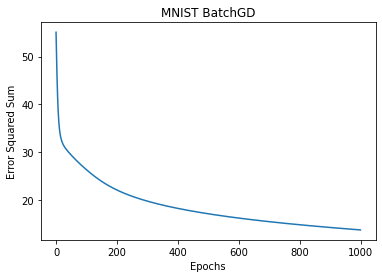

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('MNIST BatchGD')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

In [23]:
# %%writefile code/MnistSGD_LS.py
#%load code/MnistSGD_LS.py
class MnistSGD(object):
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 1, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                   # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                   # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y): 
        self.cost_ = []
        self.m_samples = len(y)
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        
        # learning rate is scheduled to decrement by a step of which the inteveral from 0 to eta
        # eqaully divided by total number of iterations (or epochs * m_samples)
        # eta_scheduled = np.linspace(self.eta, 0.0001, m_samples * self.epochs)
        
        for epoch in range(self.epochs):
            print('Training epoch {}/{}'.format(epoch+1, self.epochs))
            
            for m in range(self.m_samples):            
                # input X can be tuple, list, or ndarray
                # random_index = np.random.randint(m_samples)
                A0 = np.array(X[m], ndmin=2).T     # A0 : inputs, minimum 2 dimensional array
                Y0 = np.array(Y[m], ndmin=2).T    # Y: targets

                Z1, A1, Z2, A2 = self.forpass(A0)          # forward pass

                E2 = Y0 - A2                       # E2: output errors
                E1 = np.dot(self.W2.T, E2)         # E1: hidden errors

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)       
                dZ1 = E1 * self.g_prime(Z1)     

                # update weights
                # eta = eta_scheduled[epoch * m_samples + m]
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    
                
                self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        m_samples = len(ytest)  
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores = np.sum(yhat == ytest)
        return scores/m_samples * 100
        
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = self.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1
        return scores/m_samples * 100

In [27]:
import joy 
(X, y), (Xtest, ytest) = joy.load_mnist()

nn = MnistSGD(784, 100, 10, eta = 0.1, epochs = 20)
nn.fit(X[:1000], y[:1000])
acy = nn.evaluate(Xtest[:200], ytest[:200])
print('Accuracy {}%'.format(acy))

Training epoch 1/20
Training epoch 2/20
Training epoch 3/20
Training epoch 4/20
Training epoch 5/20
Training epoch 6/20
Training epoch 7/20
Training epoch 8/20
Training epoch 9/20
Training epoch 10/20
Training epoch 11/20
Training epoch 12/20
Training epoch 13/20
Training epoch 14/20
Training epoch 15/20
Training epoch 16/20
Training epoch 17/20
Training epoch 18/20
Training epoch 19/20
Training epoch 20/20
Accuracy 87.0%


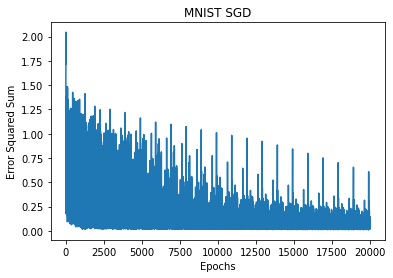

In [28]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title("MNIST SGD")
plt.xlabel("Epochs")
plt.ylabel("Error Squared Sum")
plt.show()

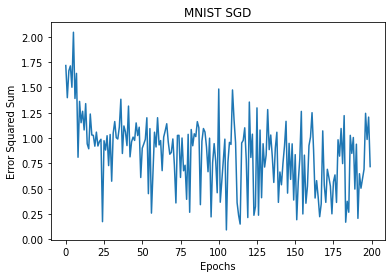

In [29]:
plt.plot(range(len(nn.cost_[:200])), nn.cost_[:200])
plt.title("MNIST SGD")
plt.xlabel("Epochs")
plt.ylabel("Error Squared Sum")
plt.show()